# Gradient filters
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_03_edge_detection/gradient_filters.ipynb)



In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_03_edge_detection/Bikesgray.jpg'.split())




In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

figsize = (10,10)



## Original image


Text(0.5, 1.0, 'Original image')

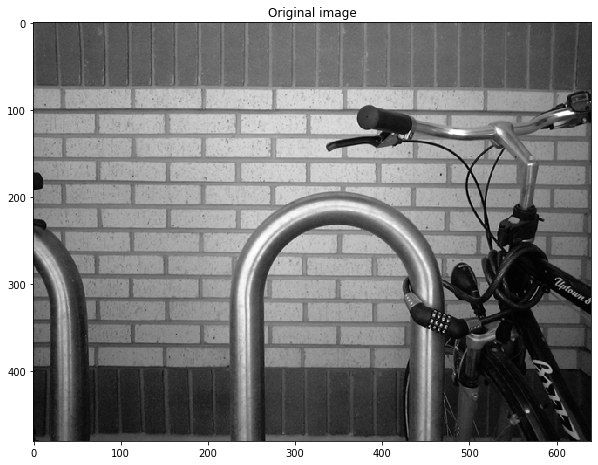

In [3]:
img = cv2.imread("Bikesgray.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original image')



## X absolute grad filter


kernel shape is (1, 3)


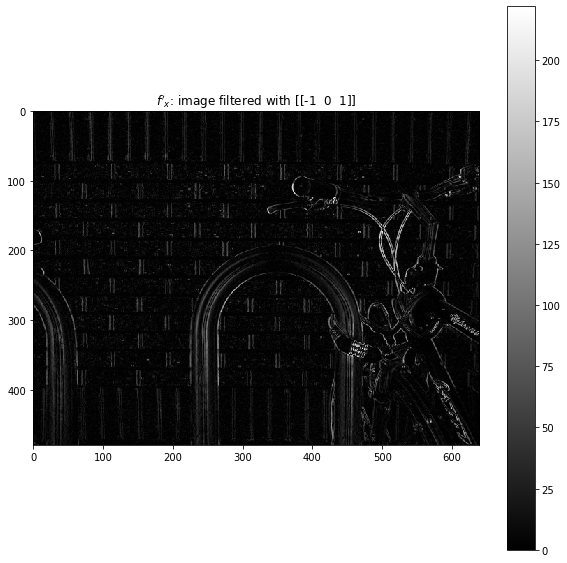

In [4]:
img = img.astype(float)  # 'uint8' doesn't work with minus sign - for filtering

# 1. cv2.filter2D is working with corelation rether than convolution
#    no need to flip the kernel
# 2. Notice that kernel is 2D array - if 1d than we will get a column vector convolution
kernel = np.array([[-1, 0, +1]])
dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=figsize)
plt.imshow(np.abs(dst), cmap='gray')
plt.colorbar()
plt.title('$f\'_x$: image filtered with '+str(kernel))

print("kernel shape is "+str(kernel.shape))



## Y grad filter (no abs)


Text(0.5, 1.0, "$f'_y$: image filtered with\n [[-1]\n [ 0]\n [ 1]]")

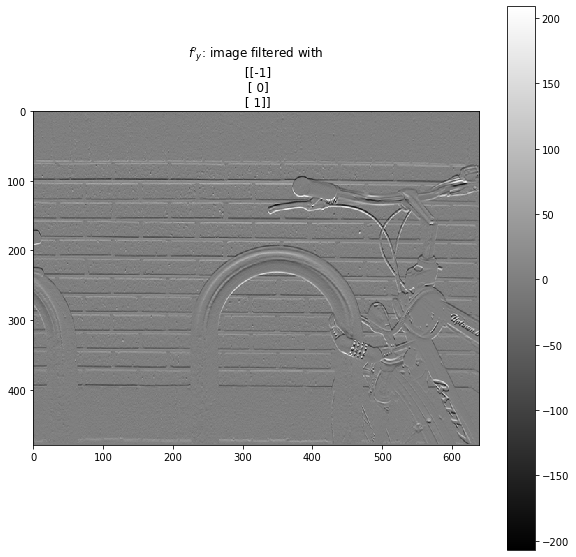

In [5]:
kernel = np.array([[-1, 0, +1]]).T
dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=figsize)
plt.imshow(dst, cmap='gray')
plt.colorbar()
plt.title('$f\'_y$: image filtered with\n '+str(kernel))




## Comparison of x gradient filters


Text(0.5, 1.0, '|symmetric-prewitt|')

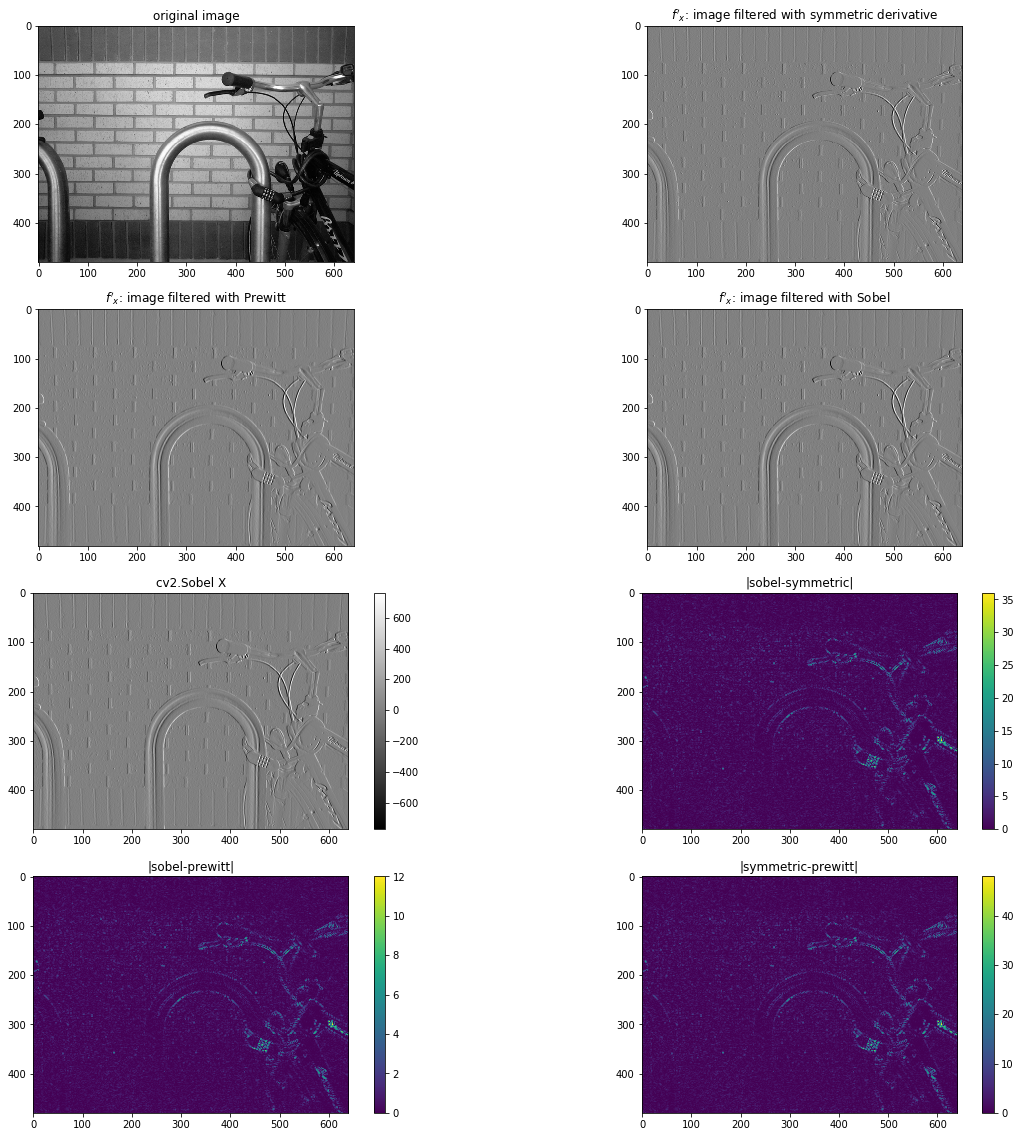

In [6]:
plt.rcParams['figure.figsize'] = [20, 20]

plt.subplot(4, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('original image')

#######################################
kernel = 1/2*np.array([[-1, 0, +1]])
dst_sym = cv2.filter2D(img, -1, kernel)

plt.subplot(4, 2, 2)
plt.imshow(dst_sym, cmap='gray')
plt.title('$f\'_x$: image filtered with symmetric derivative')

#######################################
kernel = 1/6*np.array([
    [-1, 0, +1],
    [-1, 0, +1],
    [-1, 0, +1]])
dst_prewitt = cv2.filter2D(img, -1, kernel)

plt.subplot(4, 2, 3)
plt.imshow(dst_prewitt, cmap='gray')
plt.title('$f\'_x$: image filtered with Prewitt')

#######################################
# cv2.Sobel() also exist
kernel = 1/8*np.array([
    [-1, 0, +1],
    [-2, 0, +2],
    [-1, 0, +1]])
dst_sobel = cv2.filter2D(img, -1, kernel)

plt.subplot(4, 2, 4)
plt.imshow(dst_sobel, cmap='gray')
plt.title('$f\'_x$: image filtered with Sobel')

#######################################
dst_cv2_sobel = cv2.Sobel(img, -1, 1, 0)  #cv2.Sobel(img,ddepth,x_size,y_size)

plt.subplot(4, 2, 5)
plt.imshow(dst_cv2_sobel, cmap='gray')
plt.colorbar()
plt.title('cv2.Sobel X')

#######################################
plt.subplot(4, 2, 6)
plt.imshow(np.abs(dst_sobel-dst_sym))
plt.colorbar()
plt.title('|sobel-symmetric|')

#######################################
plt.subplot(4, 2, 7)
plt.imshow(np.abs(dst_sobel-dst_prewitt))
plt.colorbar()
plt.title('|sobel-prewitt|')

#######################################
plt.subplot(4, 2, 8)
plt.imshow(np.abs(dst_sym-dst_prewitt)) 
plt.colorbar()
plt.title('|symmetric-prewitt|')


## Filtering common errors
### kernel dimension error
Note that you need to use a 2D array for a horizontal kernel!


kernel shape is (3,)


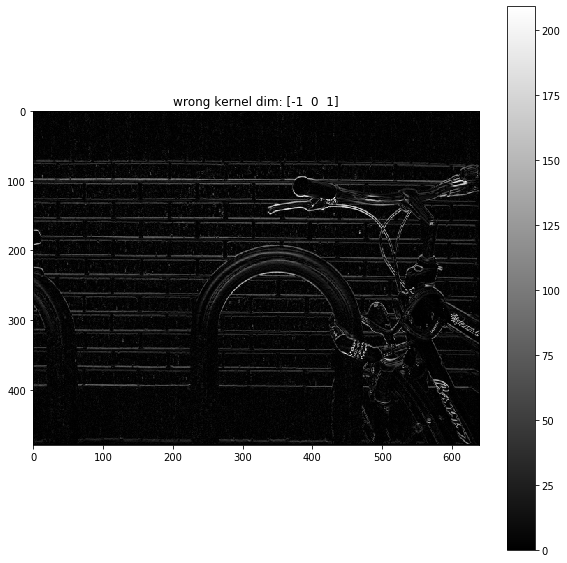

In [7]:

kernel = np.array([-1, 0, +1])
dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=figsize)
plt.imshow(np.abs(dst), cmap='gray')
plt.colorbar()
plt.title('wrong kernel dim: '+str(kernel))

print("kernel shape is "+str(kernel.shape))



### uint8 errors
Wrong filtering when keeping uint8 instead of float, because uint8 doesn't have negative numbers...


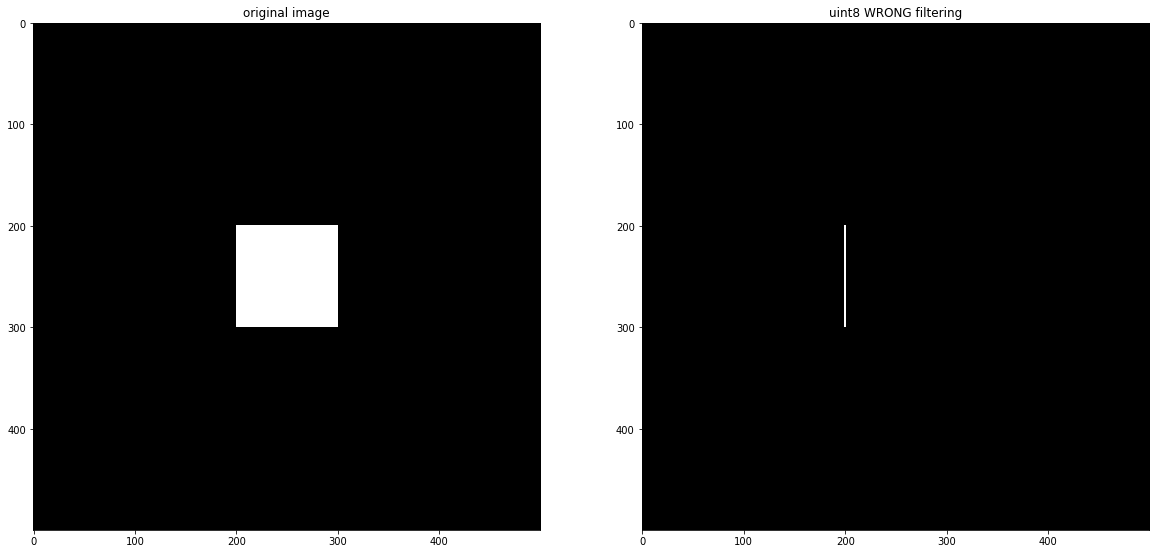

In [8]:
uint8_img = np.zeros((500, 500), dtype=np.uint8)
uint8_img[200:300, 200:300] = 1

kernel = np.array([[-1, 0, +1]])
dst = cv2.filter2D(uint8_img, -1, kernel)

fig, axs = plt.subplots(1, 2, figsize=(20,20))
axs[0].imshow(uint8_img, cmap='gray')
axs[0].title.set_text('original image')
axs[1].imshow(dst, cmap='gray')
axs[1].title.set_text('uint8 WRONG filtering')

